In [1]:
# import libraries
import os, sys, glob
import numpy as np
import matplotlib.pyplot as plt
from icecube import icetray, dataclasses, dataio, recclasses

In [3]:
# file provided by Jaun-Carlos
d = np.load("/data/user/juancarlos/notebooks/dst_20904_v3.npz")
print(list(d.keys()))

['nchannel', 'llhZen', 'llhAz', 'zenith', 'azimuth', 'mc_energy', 'type', 'isgoodllh', 'ndir', 'ldir', 'rlogl', 'atmosphere', 'TriggID_1006', 'cogx', 'cogy', 'cogz', 'logMuE', 'energy', 'GaisserH3a', 'Hoerandel', 'GlobalFitGST', 'GlobalSplineFit5Comp', 'GaisserH4a', 'reco_energy']


In [5]:
qual_cut = (d['zenith'] > 0.002) & (d['zenith'] < (np.pi - 0.002)) & (d['nchannel'] >= 10) & (d['isgoodllh'])

In [7]:
def weighted_quantiles(values, weights, quantiles=0.5):
    i = np.argsort(values)
    c = np.cumsum(weights[i])
    return values[i[np.searchsorted(c, np.array(quantiles) * c[-1])]]

In [6]:
#define a function to go from PDG code to Z
def _get_charge(ptype):
    if ptype<1000020040:
        return 1
    else:
        remainder = int(ptype)%1000000000
        remainder -= remainder%1000
        
        return remainder/10000
    
#turn it into a vectorized function (for speed)
get_charge = np.vectorize(_get_charge)

#example of usage
zarray = get_charge(d['type'])

In [14]:
lza = np.log10(zarray)

In [8]:
pcut = d['type'] == 2212
Hecut = d['type'] == 1.00002004e+09
Ncut = d['type'] == 1.000070140e+09
Alcut = d['type'] == 1.00013027e+09
Fecut =  d['type'] == 1.00026056e+09

In [9]:
BINS={
'4.125': np.logical_and(d['reco_energy'] > 4, d['reco_energy'] < 4.25),
'4.375': np.logical_and(d['reco_energy'] > 4.25, d['reco_energy'] < 4.5),
'4.625': np.logical_and(d['reco_energy'] > 4.5, d['reco_energy'] < 4.75),
'4.875': np.logical_and(d['reco_energy'] > 4.75, d['reco_energy'] < 5),
'5.125': np.logical_and(d['reco_energy'] > 5, d['reco_energy'] < 5.25),
'5.375': np.logical_and(d['reco_energy'] > 5.25, d['reco_energy'] < 5.5),
'5.75': np.logical_and(d['reco_energy'] > 5.5, d['reco_energy'] < 6),
'6.25': np.logical_and(d['reco_energy'] > 6, d['reco_energy'] < 6.5), 
'7.25': np.logical_and(d['reco_energy'] > 6.5, d['reco_energy'] < 8)
}

COLORS={
    'pRH': 'red',
    'pRG': 'red',
    'HeRH': 'orange',
    'HeRG': 'orange',
    'NRH': 'darkgreen',
    'NRG': 'darkgreen',
    'AlRH': 'blue',
    'AlRG': 'blue',
    'FeRH': 'purple',
    'FeRG': 'purple'
}

LABELS={
    'pRH': 'proton (H4a)',
    'pRG': 'proton (GSF)',
    'HeRH': 'Helium (H4a)',
    'HeRG': 'Helium (GSF)',
    'NRH': 'Nitrogen (H4a)',
    'NRG': 'Nitrogen (GSF)',
    'AlRH': 'Aluminum (H4a)',
    'AlRG': 'Aluminum (GSF)',
    'FeRH': 'Iron (H4a)',
    'FeRG': 'Iron (GSF)'
}

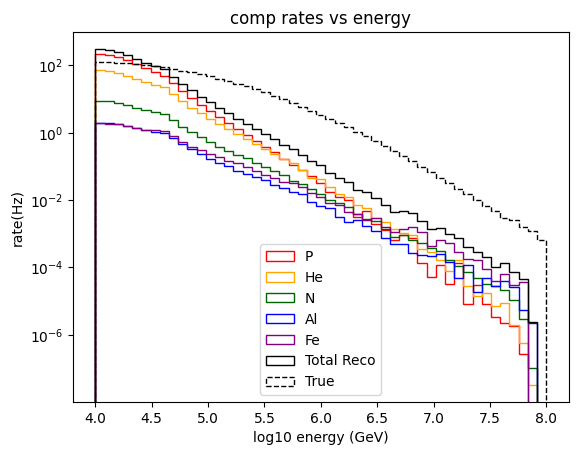

In [10]:
bins=np.linspace(4, 8, 50)

(pwtH, bins, patches1) = plt.hist(d['reco_energy'][pcut], bins = bins, log = True, weights=d['GaisserH4a'][pcut], color = 'red',histtype = 'step', label ='P')
(hwtH, bins, patches1) = plt.hist(d['reco_energy'][Hecut], bins = bins, log = True, weights=d['GaisserH4a'][Hecut],color = 'orange',histtype = 'step', label = 'He') 
(nwtH, bins, patches1) = plt.hist(d['reco_energy'][Ncut], bins = bins, log = True, weights=d['GaisserH4a'][Ncut], color='darkgreen',histtype = 'step', label = 'N')
(awtH, bins, patches1) = plt.hist(d['reco_energy'][Alcut], bins = bins, log = True, weights=d['GaisserH4a'][Alcut], color='blue',histtype = 'step', label = 'Al')
(iwtH, bins, patches1) = plt.hist(d['reco_energy'][Fecut], bins = bins, log=True, weights=d['GaisserH4a'][Fecut], color='purple', histtype='step',label='Fe')
(rwtH, bins, patches1) = plt.hist(d['reco_energy'], bins = bins, log = True, weights = d['GaisserH4a'], color = 'black', histtype = 'step', label = 'Total Reco')
(true, bins, patches1) = plt.hist(np.log10(d['energy']), bins = bins, log=True, weights = d['GaisserH4a'], color = 'black', histtype = 'step', label = 'True', linestyle = '--')
totH = pwtH + hwtH + nwtH + awtH + iwtH
plt.xlabel('log10 energy (GeV)')
plt.ylabel('rate(Hz)')
plt.title('comp rates vs energy')
plt.legend()
plt.show()

In [21]:
# Mean Atomic Charge
#bins=np.linspace(4, 8, 50)
#ncols = 2
#fig, axs = plt.subplots(figsize = (13 * ncols, 8), ncols=ncols)
#for tier in BINS:
#    [pH, bins, patches1] = axs[0].hist(d['reco_energy'][np.logical_and(BINS[tier],pcut, qual_cut)], bins = bins, log = True, weights=d['GaisserH4a'][np.logical_and(BINS[tier],pcut)], color = 'red',histtype = 'step', label ='P', density=False)
#    ax.set_title('proton')
#    [HeH, bins, patches1] = axs[0].hist(d['reco_energy'][np.logical_and(BINS[tier],Hecut, qual_cut)], bins = bins, log = True, weights=d['GaisserH4a'][np.logical_and(BINS[tier],Hecut)], color = 'orange',histtype = 'step', label ='He', density=False)
#    ax.set_title('helium')
#    [NH, bins, patches1] = axs[0].hist(d['reco_energy'][np.logical_and(BINS[tier],Ncut, qual_cut)], bins = bins, log = True, weights=d['GaisserH4a'][np.logical_and(BINS[tier],Ncut)], color = 'darkgreen',histtype = 'step', label ='N', density=False)
#    ax.set_title('nitrogen')
#    [AlH, bins, patches1] = axs[0].hist(d['reco_energy'][np.logical_and(BINS[tier],Alcut, qual_cut)], bins = bins, log = True, weights=d['GaisserH4a'][np.logical_and(BINS[tier],Alcut)], color = 'blue',histtype = 'step', label ='Al', density=False)
#    ax.set_title('aluminum')
#    [FeH, bins, patches1] = axs[0].hist(d['reco_energy'][np.logical_and(BINS[tier],Fecut, qual_cut)], bins = bins, log = True, weights=d['GaisserH4a'][np.logical_and(BINS[tier],Fecut)], color = 'purple',histtype = 'step', label ='Fe', density=False)
#    ax.set_title('iron')
#    totH = pH + HeH + NH + AlH + FeH
    
    #pfracH = pH / totH
    #HefracH = HeH / totH
    #NfracH = NH / totH
    #AlfracH = AlH / totH
    #FefracH = FeH / totH
#    
    #meanZH = ((pfracH * np.log10(1)) + (HefracH*np.log10(4)) + (NfracH*np.log10(14)) + (AlfracH*np.log10(27)) + (FefracH*np.log10(56)))
    #Mean_logZ_H4a = axs[1].plot(bins[:-1], meanZH)
    #ax.set_title('meanZ')
#plt.show()

In [12]:
def getEbins():
    return [4, 4.25, 4.5, 4.75, 5, 5.25, 5.5, 6, 6.5]
ebins = getEbins() + [8]
emids = (np.asarray(ebins)[1:] + np.asarray(ebins)[:-1])/2
print(emids)

[4.125 4.375 4.625 4.875 5.125 5.375 5.75  6.25  7.25 ]


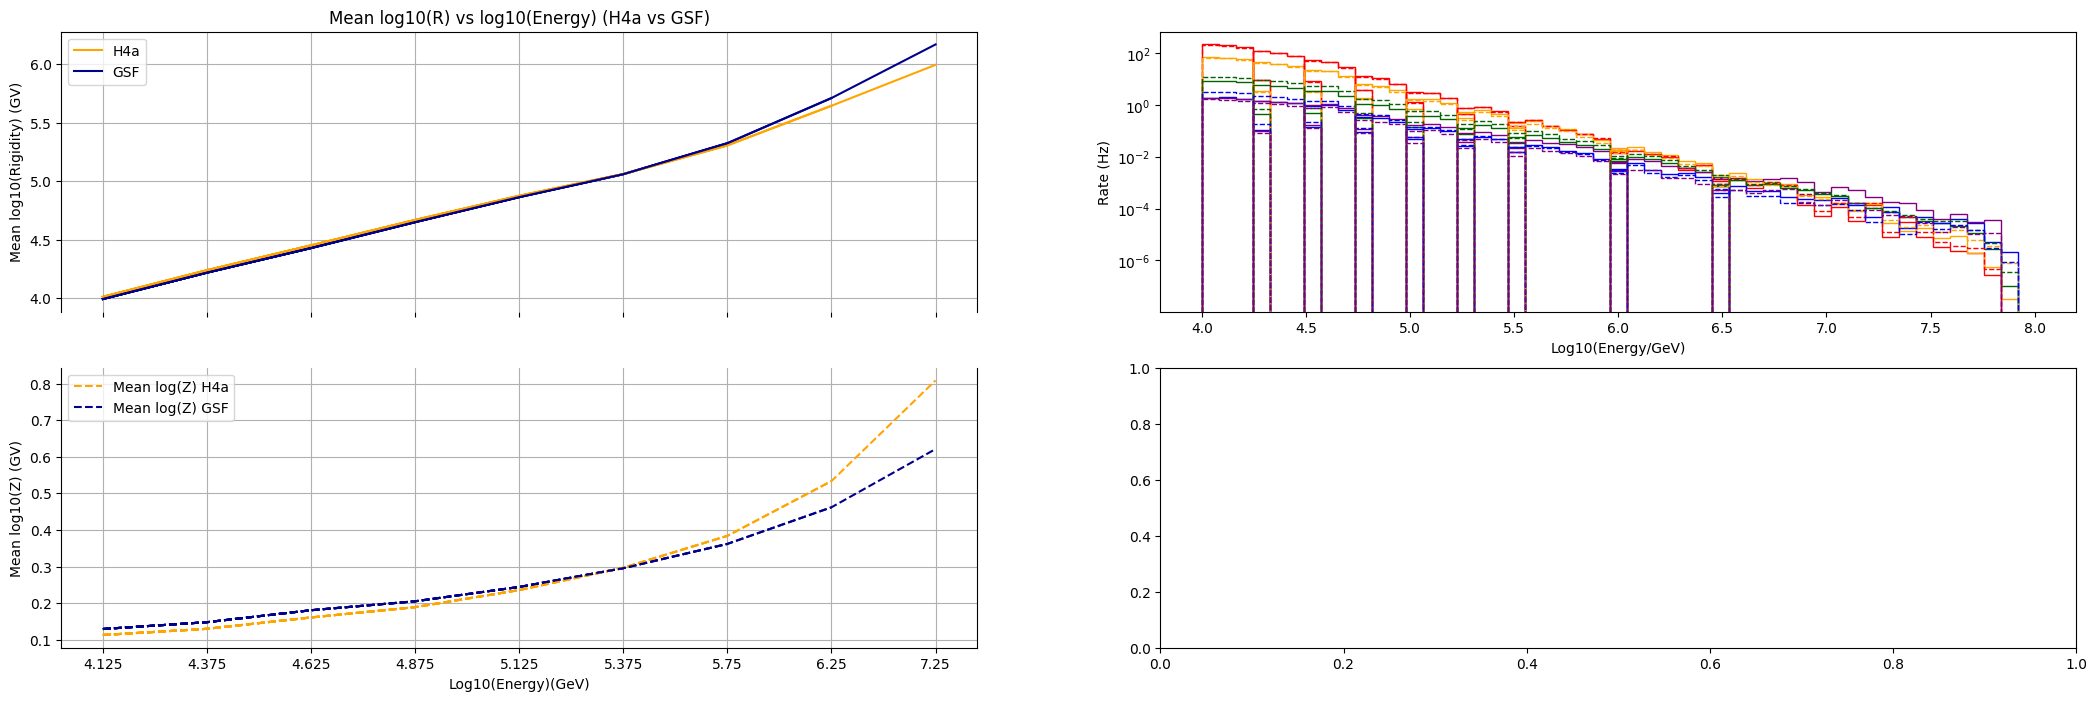

In [13]:
# Mega cell that produces mean rigidity calculations and graphs.
bins=np.linspace(4, 8, 50)
ncols=2
fig, axs = plt.subplots(figsize = (13 * ncols, 8), ncols=ncols, nrows=2)

rigidHArr = []
rigidGArr = []
meanZHArr=[]
meanZGArr=[]

for tier in BINS:
    totH = 0
    totG = 0

    # Plot the binned composition for GaisserH4a weight
    [pH, binph, p1] = axs[0,1].hist(d['reco_energy'][np.logical_and(BINS[tier],pcut, qual_cut)], bins = bins, log = True, weights=d['GaisserH4a'][np.logical_and(BINS[tier],pcut)], color = 'red',histtype = 'step', label ='P', density=False)
    [HeH, binhh, p2] = axs[0,1].hist(d['reco_energy'][np.logical_and(BINS[tier],Hecut, qual_cut)], bins = bins, log = True, weights=d['GaisserH4a'][np.logical_and(BINS[tier],Hecut)], color = 'orange',histtype = 'step', label ='He', density=False)
    [NH, binnh, p3] = axs[0,1].hist(d['reco_energy'][np.logical_and(BINS[tier],Ncut, qual_cut)], bins = bins, log = True, weights=d['GaisserH4a'][np.logical_and(BINS[tier],Ncut)], color = 'darkgreen',histtype = 'step', label ='N', density=False)
    [AlH, binah, p4] = axs[0,1].hist(d['reco_energy'][np.logical_and(BINS[tier],Alcut, qual_cut)], bins = bins, log = True, weights=d['GaisserH4a'][np.logical_and(BINS[tier],Alcut)], color = 'blue',histtype = 'step', label ='Al', density=False)
    [FeH, binfh, p5] = axs[0,1].hist(d['reco_energy'][np.logical_and(BINS[tier],Fecut, qual_cut)], bins = bins, log = True, weights=d['GaisserH4a'][np.logical_and(BINS[tier],Fecut)], color = 'purple',histtype = 'step', label ='Fe', density=False)
    totH = pH + HeH + NH + AlH + FeH
    
    # Plot the binned composition for GlobalSplineFit5Comp weight
    [pG, binpg, p6] = axs[0,1].hist(d['reco_energy'][np.logical_and(BINS[tier],pcut, qual_cut)], bins = bins, log = True, weights=d['GlobalSplineFit5Comp'][np.logical_and(BINS[tier],pcut)], color = 'red',histtype = 'step', linestyle='--', label ='P', density=False)
    [HeG, binhg, p7] = axs[0,1].hist(d['reco_energy'][np.logical_and(BINS[tier],Hecut, qual_cut)], bins = bins, log = True, weights=d['GlobalSplineFit5Comp'][np.logical_and(BINS[tier],Hecut)], color = 'orange',histtype = 'step', linestyle='--', label ='He', density=False)
    [NG, binng, p8] = axs[0,1].hist(d['reco_energy'][np.logical_and(BINS[tier],Ncut, qual_cut)], bins = bins, log = True, weights=d['GlobalSplineFit5Comp'][np.logical_and(BINS[tier],Ncut)], color = 'darkgreen',histtype = 'step', linestyle='--', label ='N', density=False)
    [AlG, binag, p9] = axs[0,1].hist(d['reco_energy'][np.logical_and(BINS[tier],Alcut, qual_cut)], bins = bins, log = True, weights=d['GlobalSplineFit5Comp'][np.logical_and(BINS[tier],Alcut)], color = 'blue',histtype = 'step', linestyle='--', label ='Al', density=False)
    [FeG, binfg, p10] = axs[0,1].hist(d['reco_energy'][np.logical_and(BINS[tier],Fecut, qual_cut)], bins = bins, log = True, weights=d['GlobalSplineFit5Comp'][np.logical_and(BINS[tier],Fecut)], color = 'purple',histtype = 'step', linestyle='--', label ='Fe', density=False)
    totG = pG + HeG + NG + AlG + FeG
    
    # Calculate the discrete binned fractional composition for the GaisserH4a weight
    pfracH = np.nanmean(pH) / np.nanmean(totH)
    HefracH = np.nanmean(HeH) / np.nanmean(totH)
    NfracH = np.nanmean(NH) / np.nanmean(totH)
    AlfracH = np.nanmean(AlH) / np.nanmean(totH)
    FefracH = np.nanmean(FeH) / np.nanmean(totH)

    # Calculate the discrete binned fractional composition for the GlobalSplineFit5Comp weight
    pfracG = np.nanmean(pG) / np.nanmean(totG)
    HefracG = np.nanmean(HeG) / np.nanmean(totG)
    NfracG = np.nanmean(NG) / np.nanmean(totG)
    AlfracG = np.nanmean(AlG) / np.nanmean(totG)
    FefracG = np.nanmean(FeG) / np.nanmean(totG)
    
    # Calculate the mean base 10 log charge and atomic mass for GaisserH4a weight
    meanAH = ((pfracH * np.log10(1)) + (HefracH*np.log10(4)) + (NfracH*np.log10(14)) + (AlfracH*np.log10(27)) + (FefracH*np.log10(56)))
    meanZH = ((pfracH*np.log10(1)) + (HefracH*np.log10(2)) + (NfracH*np.log10(7)) + (AlfracH*np.log10(13)) + (FefracH*np.log10(26)))

    # Calculate the mean base 10 log charge and atomic mass for GlobalSplineFit5Comp weight
    meanAG= ((pfracG * np.log10(1)) + (HefracG*np.log10(4)) + (NfracG*np.log10(14)) + (AlfracG*np.log10(27)) + (FefracG*np.log10(56)))
    meanZG = ((pfracG*np.log10(1)) + (HefracG*np.log10(2)) + (NfracG*np.log10(7)) + (AlfracG*np.log10(13)) + (FefracG*np.log10(26)))

    # Calculate the discrete weighted rigidities (for rgidity line graph)
    rigidH = np.average(d['reco_energy'][np.logical_and(BINS[tier], qual_cut)], weights=d['GaisserH4a'][np.logical_and(BINS[tier], qual_cut)]) - (meanZH / 1)
    rigidG = np.average(d['reco_energy'][np.logical_and(BINS[tier], qual_cut)], weights=d['GlobalSplineFit5Comp'][np.logical_and(BINS[tier], qual_cut)]) - (meanZG / 1)
    
    # Print values
    #print('**Energy bin: ' + tier + '**')
    #print('--------------------')
    #print('Proton (H4a): ' + str(round(pfracH, 3)))
    #print('Proton (GSF): ' + str(round(pfracG, 3)))
    #print('|--------------------|')
    #print('Helium (H4a): ' + str(round(HefracH, 3)))
    #print('Helium (GSF): ' + str(round(HefracG, 3)))
    #print('|--------------------|')
    #print('Nitrogen (H4a): ' + str(round(NfracH, 3)))
    #print('Nitrogen (GSF): ' + str(round(NfracG, 3)))
    #print('|--------------------|')
    #print('Aluminum (H4a): ' + str(round(AlfracH, 3)))
    #print('Aluminum (GSF): ' + str(round(AlfracG, 3)))
    #print('|--------------------|')
    #print('Iron (H4a): ' + str(round(FefracH, 3)))
    #print('Iron (GSF): ' + str(round(FefracG, 3)))
    #print('--------------------')
    #print('Mean Log10(Z) (H4a): ' + str(round(meanZH, 3)))
    #print('Mean Log10(Z) (GSF): ' + str(round(meanZG, 3)))
    #print('|--------------------|')
    #print('Mean Log10(A) (H4a): ' + str(round(meanAH, 3)))
    #print('Mean Log10(A) (GSF): ' + str(round(meanAG, 3)))
    #print('|--------------------|')
    #print('Mean log10(R) (H4a): ' + str(round(rigidH, 3)))
    #print('Mean log10(R) (GSF): ' + str(round(rigidG, 3)))
    #print()

    rigidHArr.append(rigidH)
    rigidGArr.append(rigidG)
    meanZHArr.append(meanZH)
    meanZGArr.append(meanZG)

    # Plot discrete rigidity (for rigidity line chart)
    axs[0,0].plot(rigidHArr, label='H4a' if tier == '4.125' else '', color='orange')
    axs[0,0].plot(rigidGArr, label='GSF' if tier == '4.125' else '', color='darkblue')
    axs[1,0].plot(meanZHArr, label='Mean log(Z) H4a' if tier == '4.125' else '', color='orange', linestyle='--')
    axs[1,0].plot(meanZGArr, label='Mean log(Z) GSF' if tier == '4.125' else '', color='darkblue', linestyle='--')
    
# Show plots
axs[0,1].set_xlabel('Log10(Energy/GeV)')
axs[0,1].set_ylabel('Rate (Hz)')
#axs[0,1].set_title('Binned Composition Rates vs. Energy')
axs[0,0].set_title('Mean log10(R) vs log10(Energy) (H4a vs GSF)')
axs[1,0].set_xlabel('Log10(Energy)(GeV)')
axs[0,0].set_ylabel('Mean log10(Rigidity) (GV)')
axs[1,0].set_ylabel('Mean log10(Z) (GV)')
axs[1,0].set_xticks(np.arange(0,9,1))
axs[1,0].set_xticklabels(['4.125','4.375','4.625','4.875','5.125','5.375','5.75','6.25','7.25'])
axs[0,0].set_xticklabels('')
axs[0,0].spines['bottom'].set_visible(False)
axs[1,0].spines['top'].set_visible(False)
axs[0,0].grid()
axs[1,0].grid()
axs[0,0].legend()
axs[1,0].legend()
plt.show()

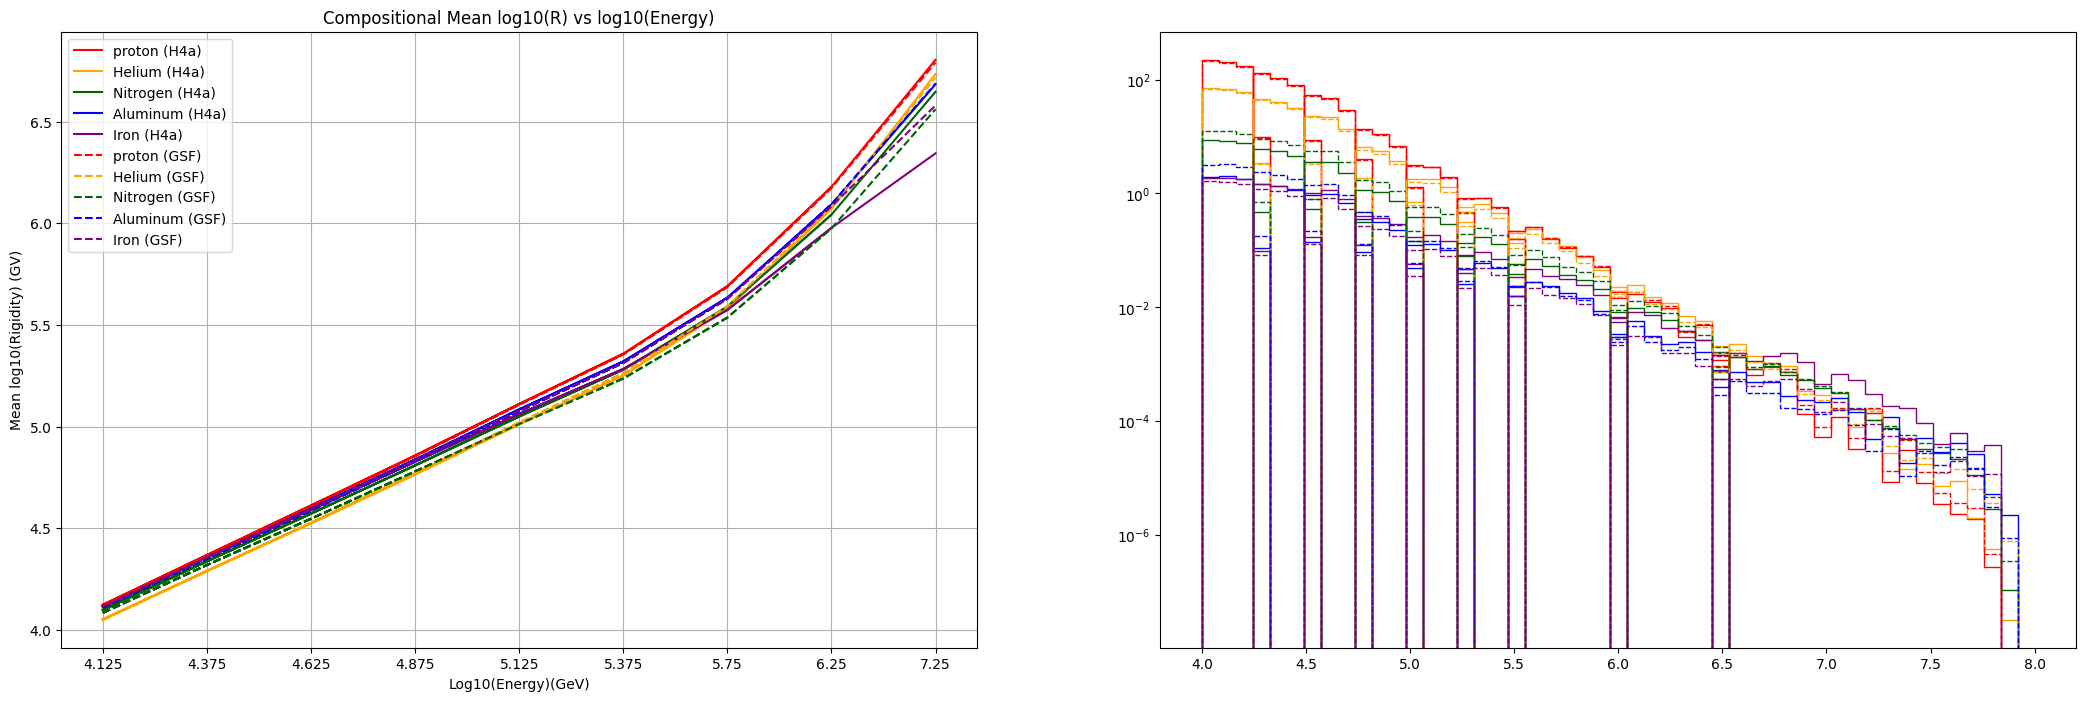

In [20]:
# Cell that produces mean compositional rigidity
bins=np.linspace(4, 8, 50)
ncols=2
fig, axs = plt.subplots(figsize = (13 * ncols, 8), ncols=ncols)
RigiDH = {
    'pRH': [],
    'HeRH': [],
    'NRH': [],
    'AlRH': [],
    'FeRH': []
}

RigiDG = {
    'pRG':  [],
    'HeRG': [],
    'NRG': [],
    'AlRG': [],
    'FeRG': []
}
for tier in BINS:
    totH = 0
    totG = 0

    # Plot the binned composition for GaisserH4a weight
    [pH, bins, patches1] = axs[1].hist(d['reco_energy'][np.logical_and(BINS[tier],pcut, qual_cut)], bins = bins, log = True, weights=d['GaisserH4a'][np.logical_and(BINS[tier],pcut)], color = 'red',histtype = 'step', label ='P', density=False)
    [HeH, bins, patches1] = axs[1].hist(d['reco_energy'][np.logical_and(BINS[tier],Hecut, qual_cut)], bins = bins, log = True, weights=d['GaisserH4a'][np.logical_and(BINS[tier],Hecut)], color = 'orange',histtype = 'step', label ='He', density=False)
    [NH, bins, patches1] = axs[1].hist(d['reco_energy'][np.logical_and(BINS[tier],Ncut, qual_cut)], bins = bins, log = True, weights=d['GaisserH4a'][np.logical_and(BINS[tier],Ncut)], color = 'darkgreen',histtype = 'step', label ='N', density=False)
    [AlH, bins, patches1] = axs[1].hist(d['reco_energy'][np.logical_and(BINS[tier],Alcut, qual_cut)], bins = bins, log = True, weights=d['GaisserH4a'][np.logical_and(BINS[tier],Alcut)], color = 'blue',histtype = 'step', label ='Al', density=False)
    [FeH, bins, patches1] = axs[1].hist(d['reco_energy'][np.logical_and(BINS[tier],Fecut, qual_cut)], bins = bins, log = True, weights=d['GaisserH4a'][np.logical_and(BINS[tier],Fecut)], color = 'purple',histtype = 'step', label ='Fe', density=False)
    totH = pH + HeH + NH + AlH + FeH
    
    # Plot the binned composition for GlobalSplineFit5Comp weight
    [pG, bins, patches1] = axs[1].hist(d['reco_energy'][np.logical_and(BINS[tier],pcut, qual_cut)], bins = bins, log = True, weights=d['GlobalSplineFit5Comp'][np.logical_and(BINS[tier],pcut)], color = 'red',histtype = 'step', linestyle='--', label ='P', density=False)
    [HeG, bins, patches1] = axs[1].hist(d['reco_energy'][np.logical_and(BINS[tier],Hecut, qual_cut)], bins = bins, log = True, weights=d['GlobalSplineFit5Comp'][np.logical_and(BINS[tier],Hecut)], color = 'orange',histtype = 'step', linestyle='--', label ='He', density=False)
    [NG, bins, patches1] = axs[1].hist(d['reco_energy'][np.logical_and(BINS[tier],Ncut, qual_cut)], bins = bins, log = True, weights=d['GlobalSplineFit5Comp'][np.logical_and(BINS[tier],Ncut)], color = 'darkgreen',histtype = 'step', linestyle='--', label ='N', density=False)
    [AlG, bins, patches1] = axs[1].hist(d['reco_energy'][np.logical_and(BINS[tier],Alcut, qual_cut)], bins = bins, log = True, weights=d['GlobalSplineFit5Comp'][np.logical_and(BINS[tier],Alcut)], color = 'blue',histtype = 'step', linestyle='--', label ='Al', density=False)
    [FeG, bins, patches1] = axs[1].hist(d['reco_energy'][np.logical_and(BINS[tier],Fecut, qual_cut)], bins = bins, log = True, weights=d['GlobalSplineFit5Comp'][np.logical_and(BINS[tier],Fecut)], color = 'purple',histtype = 'step', linestyle='--', label ='Fe', density=False)
    totG = pG + HeG + NG + AlG + FeG

    # Calculate the discrete binned fractional composition for the GaisserH4a weight    
    pfracH = np.nanmean(pH) / np.nanmean(totH)
    HefracH = np.nanmean(HeH) / np.nanmean(totH)
    NfracH = np.nanmean(NH) / np.nanmean(totH)
    AlfracH = np.nanmean(AlH) / np.nanmean(totH)
    FefracH = np.nanmean(FeH) / np.nanmean(totH)

    # Calculate the discrete binned fractional composition for the GlobalSplineFit5Comp weight
    pfracG = np.nanmean(pG) / np.nanmean(totG)
    HefracG = np.nanmean(HeG) / np.nanmean(totG)
    NfracG = np.nanmean(NG) / np.nanmean(totG)
    AlfracG = np.nanmean(AlG) / np.nanmean(totG)
    FefracG = np.nanmean(FeG) / np.nanmean(totG)

    meanZH = ((pfracH*np.log10(1)) + (HefracH*np.log10(2)) + (NfracH*np.log10(7)) + (AlfracH*np.log10(13)) + (FefracH*np.log10(26)))
    meanZG = ((pfracG*np.log10(1)) + (HefracG*np.log10(2)) + (NfracG*np.log10(7)) + (AlfracG*np.log10(13)) + (FefracG*np.log10(26)))

    # Calculate the discrete weighted rigidities (for rgidity line graph)
    pRH = np.average(d['reco_energy'][np.logical_and(BINS[tier], qual_cut)], weights=d['GaisserH4a'][np.logical_and(BINS[tier], qual_cut)]) - ((pfracH*np.log10(1)) / 1)
    pRG = np.average(d['reco_energy'][np.logical_and(BINS[tier], qual_cut)], weights=d['GlobalSplineFit5Comp'][np.logical_and(BINS[tier], qual_cut)]) - ((pfracG*np.log10(1)) / 1)

    HeRH =  np.average(d['reco_energy'][np.logical_and(BINS[tier], qual_cut)], weights=d['GaisserH4a'][np.logical_and(BINS[tier], qual_cut)]) - ((HefracH*np.log10(2)) / 1)
    HeRG = np.average(d['reco_energy'][np.logical_and(BINS[tier], qual_cut)], weights=d['GlobalSplineFit5Comp'][np.logical_and(BINS[tier], qual_cut)]) - ((HefracG*np.log10(2)) / 1)
    
    NRH = np.average(d['reco_energy'][np.logical_and(BINS[tier], qual_cut)], weights=d['GaisserH4a'][np.logical_and(BINS[tier], qual_cut)]) - ((NfracH*np.log10(7)) / 1)
    NRG = np.average(d['reco_energy'][np.logical_and(BINS[tier], qual_cut)], weights=d['GlobalSplineFit5Comp'][np.logical_and(BINS[tier], qual_cut)]) - ((NfracG*np.log10(7)) / 1)
    
    AlRH = np.average(d['reco_energy'][np.logical_and(BINS[tier], qual_cut)], weights=d['GaisserH4a'][np.logical_and(BINS[tier], qual_cut)]) - ((AlfracH*np.log10(13)) / 1)
    AlRG = np.average(d['reco_energy'][np.logical_and(BINS[tier], qual_cut)], weights=d['GlobalSplineFit5Comp'][np.logical_and(BINS[tier], qual_cut)]) - ((AlfracG*np.log10(13)) / 1)
    
    FeRH = np.average(d['reco_energy'][np.logical_and(BINS[tier], qual_cut)], weights=d['GaisserH4a'][np.logical_and(BINS[tier], qual_cut)]) - ((FefracH*np.log10(26)) / 1)
    FeRG = np.average(d['reco_energy'][np.logical_and(BINS[tier], qual_cut)], weights=d['GlobalSplineFit5Comp'][np.logical_and(BINS[tier], qual_cut)]) - ((FefracG*np.log10(26)) / 1)

    RigiDH['pRH'].append(pRH)
    RigiDH['HeRH'].append(HeRH)
    RigiDH['NRH'].append(NRH)
    RigiDH['AlRH'].append(AlRH)
    RigiDH['FeRH'].append(FeRH)
    
    RigiDG['pRG'].append(pRG)
    RigiDG['HeRG'].append(HeRG)
    RigiDG['NRG'].append(NRG)
    RigiDG['AlRG'].append(AlRG)
    RigiDG['FeRG'].append(FeRG)

    for comp in RigiDH:
        axs[0].plot(RigiDH[comp], color=COLORS[comp], label=LABELS[comp] if tier == '4.125' else '')
    for comp in RigiDG:
        axs[0].plot(RigiDG[comp], color=COLORS[comp], linestyle='--', label=LABELS[comp] if tier == '4.125' else '')
axs[0].set_title('Compositional Mean log10(R) vs log10(Energy)')
axs[0].set_xlabel('Log10(Energy)(GeV)')
axs[0].set_ylabel('Mean log10(Rigidity) (GV)')
axs[0].set_xticks(np.arange(0,9,1))
axs[0].set_xticklabels(['4.125','4.375','4.625','4.875','5.125','5.375','5.75','6.25','7.25'])
axs[0].grid()
axs[0].legend()
plt.show()

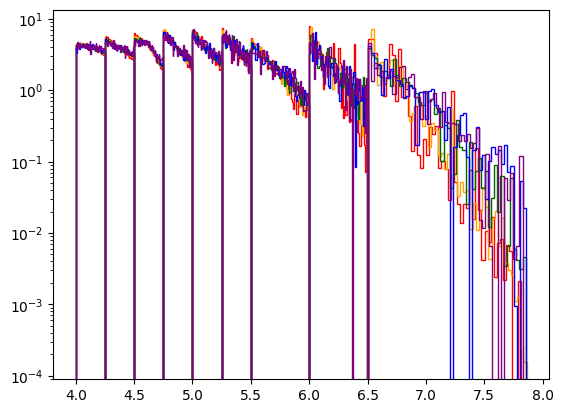

In [15]:
# Cell that creates histograms for the median rigidity calculation pipeline
#bins=np.linspace(4, 8, 50)
# Plot the binned composition for GaisserH4a weight
[pH1, binph1, pp1] = plt.hist(d['reco_energy'][np.logical_and(BINS['4.125'],pcut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['4.125'],pcut)], color = 'red',histtype = 'step', label ='P', density=True)
[HeH1, binhh1, ph1] = plt.hist(d['reco_energy'][np.logical_and(BINS['4.125'],Hecut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['4.125'],Hecut)], color = 'orange',histtype = 'step', label ='He', density=True)
[NH1, binnh1, pn1] = plt.hist(d['reco_energy'][np.logical_and(BINS['4.125'],Ncut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['4.125'],Ncut)], color = 'darkgreen',histtype = 'step', label ='N', density=True)
[AlH1, binah1, pa1] = plt.hist(d['reco_energy'][np.logical_and(BINS['4.125'],Alcut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['4.125'],Alcut)], color = 'blue',histtype = 'step', label ='Al', density=True)
[FeH1, binfh1, pf1] = plt.hist(d['reco_energy'][np.logical_and(BINS['4.125'],Fecut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['4.125'],Fecut)], color = 'purple',histtype = 'step', label ='Fe', density=True)
    # Plot the binned composition for GaisserH4a weight
[pH2, binph2, pp2] = plt.hist(d['reco_energy'][np.logical_and(BINS['4.375'],pcut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['4.375'],pcut)], color = 'red',histtype = 'step', label ='P', density=True)
[HeH2, binhh2, ph2] = plt.hist(d['reco_energy'][np.logical_and(BINS['4.375'],Hecut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['4.375'],Hecut)], color = 'orange',histtype = 'step', label ='He', density=True)
[NH2, binnh2, pn2] = plt.hist(d['reco_energy'][np.logical_and(BINS['4.375'],Ncut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['4.375'],Ncut)], color = 'darkgreen',histtype = 'step', label ='N', density=True)
[AlH2, binah2, pa2] = plt.hist(d['reco_energy'][np.logical_and(BINS['4.375'],Alcut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['4.375'],Alcut)], color = 'blue',histtype = 'step', label ='Al', density=True)
[FeH2, binfh2, pf2] = plt.hist(d['reco_energy'][np.logical_and(BINS['4.375'],Fecut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['4.375'],Fecut)], color = 'purple',histtype = 'step', label ='Fe', density=True)
    # Plot the binned composition for GaisserH4a weight
[pH3, binph3, pp3] = plt.hist(d['reco_energy'][np.logical_and(BINS['4.625'],pcut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['4.625'],pcut)], color = 'red',histtype = 'step', label ='P', density=True)
[HeH3, binhh3, ph3] = plt.hist(d['reco_energy'][np.logical_and(BINS['4.625'],Hecut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['4.625'],Hecut)], color = 'orange',histtype = 'step', label ='He', density=True)
[NH3, binnh3, pn3] = plt.hist(d['reco_energy'][np.logical_and(BINS['4.625'],Ncut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['4.625'],Ncut)], color = 'darkgreen',histtype = 'step', label ='N', density=True)
[AlH3, binah3, pa3] = plt.hist(d['reco_energy'][np.logical_and(BINS['4.625'],Alcut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['4.625'],Alcut)], color = 'blue',histtype = 'step', label ='Al', density=True)
[FeH3, binfh3, pf3] = plt.hist(d['reco_energy'][np.logical_and(BINS['4.625'],Fecut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['4.625'],Fecut)], color = 'purple',histtype = 'step', label ='Fe', density=True)
    # Plot the binned composition for GaisserH4a weight
[pH4, binph4, pp4] = plt.hist(d['reco_energy'][np.logical_and(BINS['4.875'],pcut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['4.875'],pcut)], color = 'red',histtype = 'step', label ='P', density=True)
[HeH4, binhh4, ph4] = plt.hist(d['reco_energy'][np.logical_and(BINS['4.875'],Hecut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['4.875'],Hecut)], color = 'orange',histtype = 'step', label ='He', density=True)
[NH4, binnh4, pn4] = plt.hist(d['reco_energy'][np.logical_and(BINS['4.875'],Ncut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['4.875'],Ncut)], color = 'darkgreen',histtype = 'step', label ='N', density=True)
[AlH4, binah4, pa4] = plt.hist(d['reco_energy'][np.logical_and(BINS['4.875'],Alcut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['4.875'],Alcut)], color = 'blue',histtype = 'step', label ='Al', density=True)
[FeH4, binfh4, pf] = plt.hist(d['reco_energy'][np.logical_and(BINS['4.875'],Fecut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['4.875'],Fecut)], color = 'purple',histtype = 'step', label ='Fe', density=True)
    # Plot the binned composition for GaisserH4a weight
[pH5, binph5, pp5] = plt.hist(d['reco_energy'][np.logical_and(BINS['5.125'],pcut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['5.125'],pcut)], color = 'red',histtype = 'step', label ='P', density=True)
[HeH5, binhh5, ph5] = plt.hist(d['reco_energy'][np.logical_and(BINS['5.125'],Hecut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['5.125'],Hecut)], color = 'orange',histtype = 'step', label ='He', density=True)
[NH5, binnh5, pn5] = plt.hist(d['reco_energy'][np.logical_and(BINS['5.125'],Ncut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['5.125'],Ncut)], color = 'darkgreen',histtype = 'step', label ='N', density=True)
[AlH5, binah5, pa5] = plt.hist(d['reco_energy'][np.logical_and(BINS['5.125'],Alcut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['5.125'],Alcut)], color = 'blue',histtype = 'step', label ='Al', density=True)
[FeH5, binfh5, pf5] = plt.hist(d['reco_energy'][np.logical_and(BINS['5.125'],Fecut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['5.125'],Fecut)], color = 'purple',histtype = 'step', label ='Fe', density=True)
    # Plot the binned composition for GaisserH4a weight
[pH6, binph6, pp6] = plt.hist(d['reco_energy'][np.logical_and(BINS['5.375'],pcut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['5.375'],pcut)], color = 'red',histtype = 'step', label ='P', density=True)
[HeH6, binhh6, ph6] = plt.hist(d['reco_energy'][np.logical_and(BINS['5.375'],Hecut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['5.375'],Hecut)], color = 'orange',histtype = 'step', label ='He', density=True)
[NH6, binnh6, pn6] = plt.hist(d['reco_energy'][np.logical_and(BINS['5.375'],Ncut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['5.375'],Ncut)], color = 'darkgreen',histtype = 'step', label ='N', density=True)
[AlH6, binah6, pa6] = plt.hist(d['reco_energy'][np.logical_and(BINS['5.375'],Alcut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['5.375'],Alcut)], color = 'blue',histtype = 'step', label ='Al', density=True)
[FeH6, binfh6, pf6] = plt.hist(d['reco_energy'][np.logical_and(BINS['5.375'],Fecut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['5.375'],Fecut)], color = 'purple',histtype = 'step', label ='Fe', density=True)
    # Plot the binned composition for GaisserH4a weight
[pH7, binph7, pp7] = plt.hist(d['reco_energy'][np.logical_and(BINS['5.75'],pcut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['5.75'],pcut)], color = 'red',histtype = 'step', label ='P', density=True)
[HeH7, binhh7, ph7] = plt.hist(d['reco_energy'][np.logical_and(BINS['5.75'],Hecut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['5.75'],Hecut)], color = 'orange',histtype = 'step', label ='He', density=True)
[NH7, binnh7, pn7] = plt.hist(d['reco_energy'][np.logical_and(BINS['5.75'],Ncut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['5.75'],Ncut)], color = 'darkgreen',histtype = 'step', label ='N', density=True)
[AlH7, binah7, pa7] = plt.hist(d['reco_energy'][np.logical_and(BINS['5.75'],Alcut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['5.75'],Alcut)], color = 'blue',histtype = 'step', label ='Al', density=True)
[FeH7, binfh7, pf7] = plt.hist(d['reco_energy'][np.logical_and(BINS['5.75'],Fecut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['5.75'],Fecut)], color = 'purple',histtype = 'step', label ='Fe', density=True)
    # Plot the binned composition for GaisserH4a weight
[pH8, binph8, pp8] = plt.hist(d['reco_energy'][np.logical_and(BINS['6.25'],pcut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['6.25'],pcut)], color = 'red',histtype = 'step', label ='P', density=True)
[HeH8, binhh8, ph8] = plt.hist(d['reco_energy'][np.logical_and(BINS['6.25'],Hecut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['6.25'],Hecut)], color = 'orange',histtype = 'step', label ='He', density=True)
[NH8, binnh8, pn8] = plt.hist(d['reco_energy'][np.logical_and(BINS['6.25'],Ncut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['6.25'],Ncut)], color = 'darkgreen',histtype = 'step', label ='N', density=True)
[AlH8, binah8, pa8] = plt.hist(d['reco_energy'][np.logical_and(BINS['6.25'],Alcut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['6.25'],Alcut)], color = 'blue',histtype = 'step', label ='Al', density=True)
[FeH8, binfh8, pf8] = plt.hist(d['reco_energy'][np.logical_and(BINS['6.25'],Fecut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['6.25'],Fecut)], color = 'purple',histtype = 'step', label ='Fe', density=True)
    # Plot the binned composition for GaisserH4a weight
[pH9, binph9, pp9] = plt.hist(d['reco_energy'][np.logical_and(BINS['7.25'],pcut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['7.25'],pcut)], color = 'red',histtype = 'step', label ='P', density=True)
[HeH9, binhh9, ph9] = plt.hist(d['reco_energy'][np.logical_and(BINS['7.25'],Hecut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['7.25'],Hecut)], color = 'orange',histtype = 'step', label ='He', density=True)
[NH9, binnh9, pn9] = plt.hist(d['reco_energy'][np.logical_and(BINS['7.25'],Ncut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['7.25'],Ncut)], color = 'darkgreen',histtype = 'step', label ='N', density=True)
[AlH9, binah9, pa9] = plt.hist(d['reco_energy'][np.logical_and(BINS['7.25'],Alcut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['7.25'],Alcut)], color = 'blue',histtype = 'step', label ='Al', density=True)
[FeH9, binfh9, pf9] = plt.hist(d['reco_energy'][np.logical_and(BINS['7.25'],Fecut, qual_cut)], bins = 50, log = True, weights=d['GaisserH4a'][np.logical_and(BINS['7.25'],Fecut)], color = 'purple',histtype = 'step', label ='Fe', density=True)


In [16]:
# Calculation of the median bins for each energy bin
# 1
mbinprh_1 = (binph1[:1]+binph1[:-1])/2 - np.log10(1)
mbinhrh_1 = (binhh1[:1]+binhh1[:-1])/2 - np.log10(2)
mbinnrh_1 = (binnh1[:1]+binnh1[:-1])/2 - np.log10(7)
mbinarh_1 = (binah1[:1]+binah1[:-1])/2 - np.log10(13)
mbinfrh_1 = (binfh1[:1]+binfh1[:-1])/2 - np.log10(26)
medbin_1 = np.append((np.append((np.append(mbinprh_1, mbinhrh_1)), (np.append(mbinnrh_1, mbinarh_1)))),mbinfrh_1)
medwt_1 = np.append((np.append((np.append(pH1, HeH1)), (np.append(NH1, AlH1)))), FeH1)
#2
mbinprh_2 = (binph2[:1]+binph2[:-1])/2 - np.log10(1)
mbinhrh_2 = (binhh2[:1]+binhh2[:-1])/2 - np.log10(2)
mbinnrh_2 = (binnh2[:1]+binnh2[:-1])/2 - np.log10(7)
mbinarh_2 = (binah2[:1]+binah2[:-1])/2 - np.log10(13)
mbinfrh_2 = (binfh2[:1]+binfh2[:-1])/2 - np.log10(26)
medbin_2 = np.append((np.append((np.append(mbinprh_2, mbinhrh_2)), (np.append(mbinnrh_2, mbinarh_2)))),mbinfrh_2)
medwt_2 = np.append((np.append((np.append(pH2, HeH2)), (np.append(NH2, AlH2)))), FeH2)
#3
mbinprh_3 = (binph3[:1]+binph3[:-1])/2 - np.log10(1)
mbinhrh_3 = (binhh3[:1]+binhh3[:-1])/2 - np.log10(2)
mbinnrh_3 = (binnh3[:1]+binnh3[:-1])/2 - np.log10(7)
mbinarh_3 = (binah3[:1]+binah3[:-1])/2 - np.log10(13)
mbinfrh_3 = (binfh3[:1]+binfh3[:-1])/2 - np.log10(26)
medbin_3 = np.append((np.append((np.append(mbinprh_3, mbinhrh_3)), (np.append(mbinnrh_3, mbinarh_3)))),mbinfrh_3)
medwt_3 = np.append((np.append((np.append(pH3, HeH3)), (np.append(NH3, AlH3)))), FeH3)
#4
mbinprh_4 = (binph4[:1]+binph4[:-1])/2 - np.log10(1)
mbinhrh_4 = (binhh4[:1]+binhh4[:-1])/2 - np.log10(2)
mbinnrh_4 = (binnh4[:1]+binnh4[:-1])/2 - np.log10(7)
mbinarh_4 = (binah4[:1]+binah4[:-1])/2 - np.log10(13)
mbinfrh_4 = (binfh4[:1]+binfh4[:-1])/2 - np.log10(26)
medbin_4 = np.append((np.append((np.append(mbinprh_4, mbinhrh_4)), (np.append(mbinnrh_4, mbinarh_4)))),mbinfrh_4)
medwt_4 = np.append((np.append((np.append(pH4, HeH4)), (np.append(NH4, AlH4)))), FeH4)
#5
mbinprh_5 = (binph5[:1]+binph5[:-1])/2 - np.log10(1)
mbinhrh_5 = (binhh5[:1]+binhh5[:-1])/2 - np.log10(2)
mbinnrh_5 = (binnh5[:1]+binnh5[:-1])/2 - np.log10(7)
mbinarh_5 = (binah5[:1]+binah5[:-1])/2 - np.log10(13)
mbinfrh_5 = (binfh5[:1]+binfh5[:-1])/2 - np.log10(26)
medbin_5 = np.append((np.append((np.append(mbinprh_5, mbinhrh_5)), (np.append(mbinnrh_5, mbinarh_5)))),mbinfrh_5)
medwt_5 = np.append((np.append((np.append(pH5, HeH5)), (np.append(NH5, AlH5)))), FeH5)
#6
mbinprh_6 = (binph6[:1]+binph6[:-1])/2 - np.log10(1)
mbinhrh_6 = (binhh6[:1]+binhh6[:-1])/2 - np.log10(2)
mbinnrh_6 = (binnh6[:1]+binnh6[:-1])/2 - np.log10(7)
mbinarh_6 = (binah6[:1]+binah6[:-1])/2 - np.log10(13)
mbinfrh_6 = (binfh6[:1]+binfh6[:-1])/2 - np.log10(26)
medbin_6 = np.append((np.append((np.append(mbinprh_6, mbinhrh_6)), (np.append(mbinnrh_6, mbinarh_6)))),mbinfrh_6)
medwt_6 = np.append((np.append((np.append(pH6, HeH6)), (np.append(NH6, AlH6)))), FeH6)
# 7
mbinprh_7 = (binph7[:1]+binph7[:-1])/2 - np.log10(1)
mbinhrh_7 = (binhh7[:1]+binhh7[:-1])/2 - np.log10(2)
mbinnrh_7 = (binnh7[:1]+binnh7[:-1])/2 - np.log10(7)
mbinarh_7 = (binah7[:1]+binah7[:-1])/2 - np.log10(13)
mbinfrh_7 = (binfh7[:1]+binfh7[:-1])/2 - np.log10(26)
medbin_7 = np.append((np.append((np.append(mbinprh_7, mbinhrh_7)), (np.append(mbinnrh_7, mbinarh_7)))),mbinfrh_7)
medwt_7 = np.append((np.append((np.append(pH7, HeH7)), (np.append(NH7, AlH7)))), FeH7)
#8
mbinprh_8 = (binph8[:1]+binph8[:-1])/2 - np.log10(1)
mbinhrh_8 = (binhh8[:1]+binhh8[:-1])/2 - np.log10(2)
mbinnrh_8 = (binnh8[:1]+binnh8[:-1])/2 - np.log10(7)
mbinarh_8 = (binah8[:1]+binah8[:-1])/2 - np.log10(13)
mbinfrh_8 = (binfh8[:1]+binfh8[:-1])/2 - np.log10(26)
medbin_8 = np.append((np.append((np.append(mbinprh_8, mbinhrh_8)), (np.append(mbinnrh_8, mbinarh_8)))),mbinfrh_8)
medwt_8 = np.append((np.append((np.append(pH8, HeH8)), (np.append(NH8, AlH8)))), FeH8)
#9
mbinprh_9 = (binph9[:1]+binph9[:-1])/2 - np.log10(1)
mbinhrh_9 = (binhh9[:1]+binhh9[:-1])/2 - np.log10(2)
mbinnrh_9 = (binnh9[:1]+binnh9[:-1])/2 - np.log10(7)
mbinarh_9 = (binah9[:1]+binah9[:-1])/2 - np.log10(13)
mbinfrh_9 = (binfh9[:1]+binfh9[:-1])/2 - np.log10(26)
medbin_9 = np.append((np.append((np.append(mbinprh_9, mbinhrh_9)), (np.append(mbinnrh_9, mbinarh_9)))),mbinfrh_9)
medwt_9 = np.append((np.append((np.append(pH9, HeH9)), (np.append(NH9, AlH9)))), FeH9)



In [17]:
# Print the median rigidty from the median bins (in GigaVolts)
print('median R (4.13 logE bin): ' + str(round(np.median(medbin_1),2)) + ' GV')
print('median R (4.38 logE bin): ' + str(round(np.median(medbin_2),2)) + ' GV')
print('median R (4.63 logE bin): ' + str(round(np.median(medbin_3),2)) + ' GV')
print('median R (4.88 logE bin): ' + str(round(np.median(medbin_4),2)) + ' GV')
print('median R (5.13 logE bin): ' + str(round(np.median(medbin_5),2)) + ' GV')
print('median R (5.38 logE bin): ' + str(round(np.median(medbin_6),2)) + ' GV')
print('median R (5.75 logE bin): ' + str(round(np.median(medbin_7),2)) + ' GV')
print('median R (6.25 logE bin): ' + str(round(np.median(medbin_8),2)) + ' GV')
print('median R (7.25 logE bin): ' + str(round(np.median(medbin_9),2)) + ' GV')

median R (4.13 logE bin): 3.22 GV
median R (4.38 logE bin): 3.47 GV
median R (4.63 logE bin): 3.72 GV
median R (4.88 logE bin): 3.97 GV
median R (5.13 logE bin): 4.22 GV
median R (5.38 logE bin): 4.47 GV
median R (5.75 logE bin): 4.78 GV
median R (6.25 logE bin): 5.28 GV
median R (7.25 logE bin): 6.02 GV


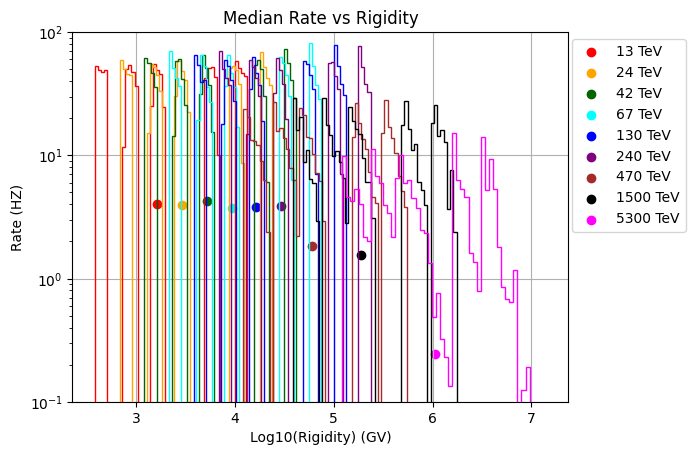

In [45]:
# Cell that plots the median energy bins in a histogram and their median values in a scatter plot
plt.hist(medbin_1, weights=medwt_1, bins=50, log=True, histtype='step', density=False, color='red')
plt.hist(medbin_2, weights=medwt_2, bins=50, log=True, histtype='step', density=False, color='orange')
plt.hist(medbin_3, weights=medwt_3, bins=50, log=True, histtype='step', density=False, color='darkgreen')
plt.hist(medbin_4, weights=medwt_4, bins=50, log=True, histtype='step', density=False, color='cyan')
plt.hist(medbin_5, weights=medwt_5, bins=50, log=True, histtype='step', density=False, color='blue')
plt.hist(medbin_6, weights=medwt_6, bins=50, log=True, histtype='step', density=False, color='purple')
plt.hist(medbin_7, weights=medwt_7, bins=50, log=True, histtype='step', density=False, color='brown')
plt.hist(medbin_8, weights=medwt_8, bins=50, log=True, histtype='step', density=False, color='black')
plt.hist(medbin_9, weights=medwt_9, bins=50, log=True, histtype='step', density=False, color='magenta')

plt.scatter(np.median(medbin_1), np.median(medwt_1), color='red', label='13 TeV')
plt.scatter(np.median(medbin_2), np.median(medwt_2), color='orange', label='24 TeV')
plt.scatter(np.median(medbin_3), np.median(medwt_3), color='darkgreen', label='42 TeV')
plt.scatter(np.median(medbin_4), np.median(medwt_4), color='cyan', label='67 TeV')
plt.scatter(np.median(medbin_5), np.median(medwt_5), color='blue', label='130 TeV')
plt.scatter(np.median(medbin_6), np.median(medwt_6), color='purple', label='240 TeV')
plt.scatter(np.median(medbin_7), np.median(medwt_7), color='brown', label='470 TeV')
plt.scatter(np.median(medbin_8), np.median(medwt_8), color='black', label='1500 TeV')
plt.scatter(np.median(medbin_9), np.median(medwt_9), color='magenta', label='5300 TeV')

plt.title('Median Rate vs Rigidity')
plt.xlabel('Log10(Rigidity) (GV)')
plt.ylabel('Rate (HZ)')
plt.ylim(.1,100)
plt.grid()
plt.legend(bbox_to_anchor=(1.25, 1))

Text(0.5, 1.0, 'possible in-ice/icetop rigidty overlap')

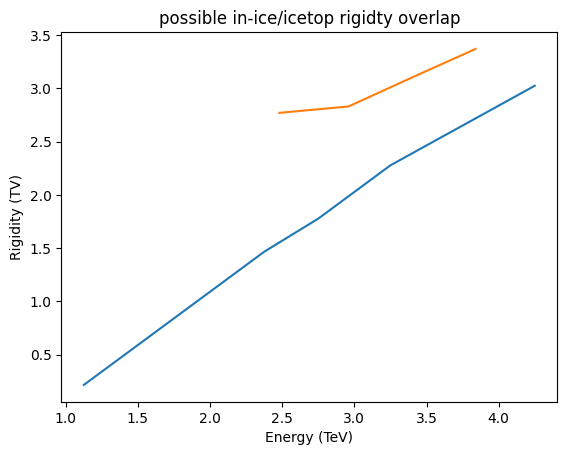

In [47]:
# Little cell that creates a line plot to compare in-ice and icetop median rigidity
medArr=[np.median(medbin_1)-3,np.median(medbin_2)-3,np.median(medbin_3)-3,np.median(medbin_4)-3,np.median(medbin_5)-3,
        np.median(medbin_6)-3,np.median(medbin_7)-3,np.median(medbin_8)-3,np.median(medbin_9)-3]
medX=emids-3
ITmedArr=[2.77,2.83,3.09,3.37]
ITmedX=[2.48,2.96,3.38,3.84]
plt.plot(medX, medArr)
plt.plot(ITmedX, ITmedArr)
plt.xlabel('Energy (TeV)')
plt.ylabel('Rigidity (TV)')
plt.title('possible in-ice/icetop rigidty overlap')